<b><span style='color:#444444;font-size:200%;font-family:Calibri'>|</span><span style='color:#e29930;font-size:200%;font-family:Calibri'> Исследование данных о продаже квартир</span></b>


В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем все необходимые библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep=';')
df.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [3]:
# датафрейм выглядит некорректно, попробуем это исправить:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-balcony — число балконов
-ceiling_height — высота потолков (м)
-cityCenters_nearest — расстояние до центра города (м)
-days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-first_day_exposition — дата публикации
-floor — этаж
-floors_total — всего этажей в доме
-is_apartment — апартаменты (булев тип)
-kitchen_area — площадь кухни в квадратных метрах (м²)
-last_price — цена на момент снятия с публикации
-living_area — жилая площадь в квадратных метрах (м²)
-locality_name — название населённого пункта
-open_plan — свободная планировка (булев тип)
-parks_around3000 — число парков в радиусе 3 км
-parks_nearest — расстояние до ближайшего парка (м)
-ponds_around3000 — число водоёмов в радиусе 3 км
-ponds_nearest — расстояние до ближайшего водоёма (м)
-rooms — число комнат
-studio — квартира-студия (булев тип)
-total_area — общая площадь квартиры в квадратных метрах (м²)
-total_images — число фотографий квартиры в объявлении

In [4]:
# изучим общую информацию о датафрейме
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
# по данной таблице видим интересные особенности некоторых квартир: 
# есть квартиры с количеством комнат равным 0, высотой 1 метр и 100 метров, расстоянием до аэропорта 0 м и т.д
# данные показатели ставят под вопрос корректность данных, будем учитывать это при дальнейшей обработке

In [7]:
df.duplicated().sum() # посчитаем кол-во дубликатов

0

<AxesSubplot:>

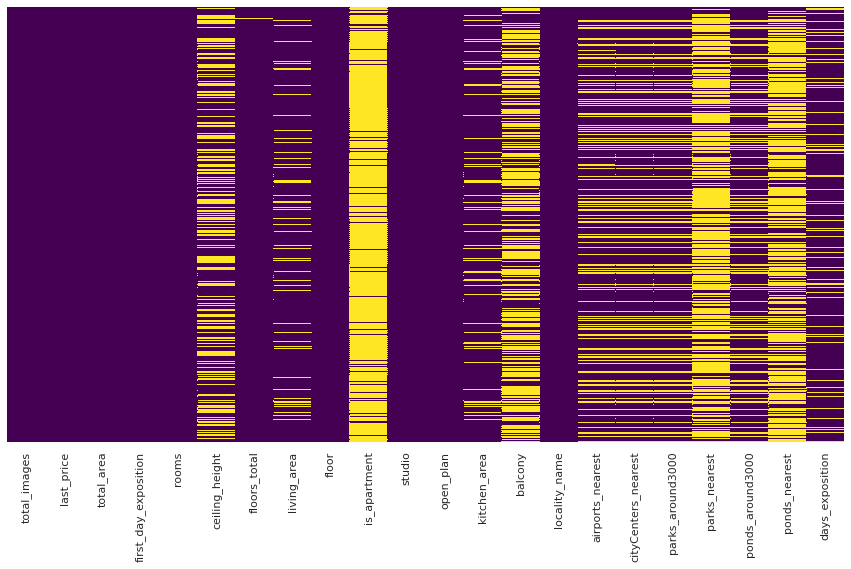

In [8]:
# из общей информации о датафрейме видим достаточно большое количество пропусков 
# представим информацию о пропусках более наглядно и посмотрим их распределение по столбцам
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

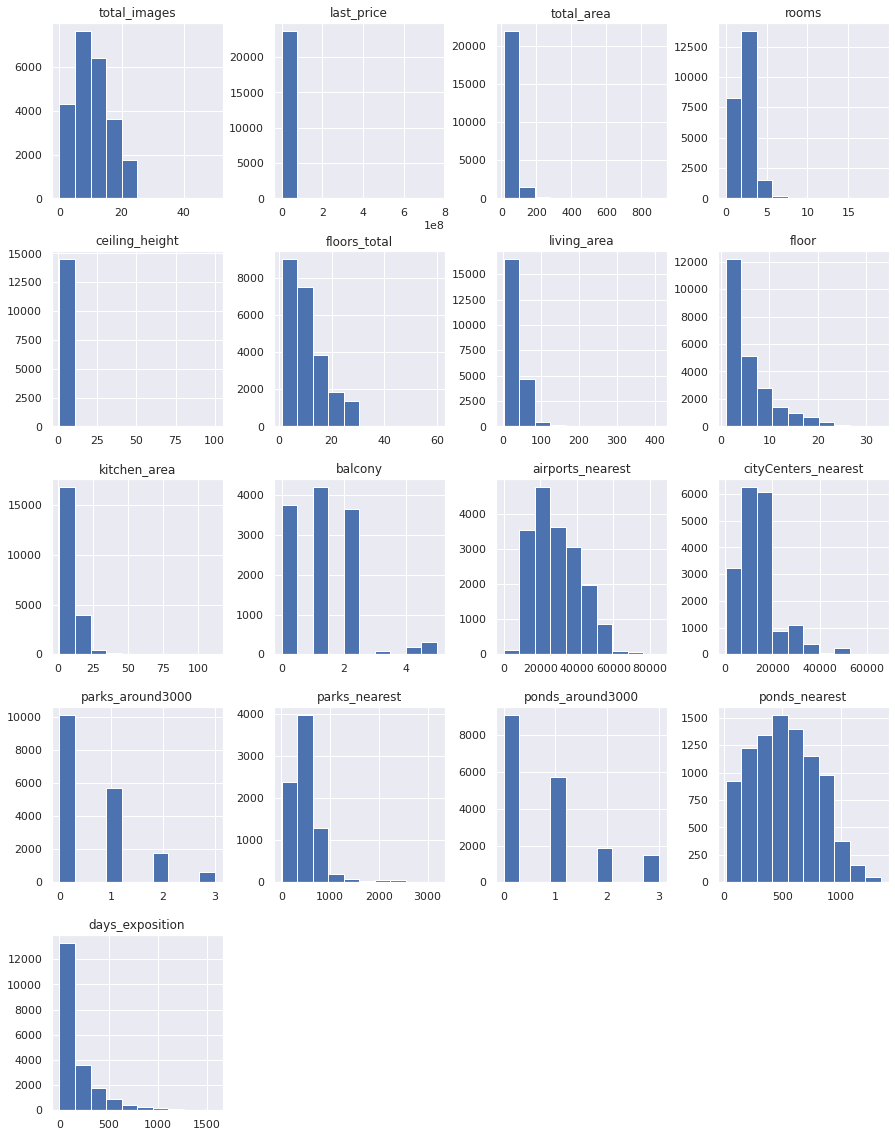

In [9]:
# построим общую гистограмму для всех числовых столбцов датафрейма
df.hist(figsize=(15, 20));

Вывод: Прочитав датафрейм, мы убедились что в нем нет дубликатов, однако присутствует большое кол-во пропусков, и не все типы данных отобразились корректно, исправим это в следующем разделе проекта.. 

### Предобработка данных

In [10]:
# Начнем предобработку данных, заполним пропуски где это возможно:
# Для этого еще раз выведем количество пропусков по столбцам:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [12]:
# balcony
# Начнем убирать значения Nan в столбце с балконами, допускаем что квартиры, которые не имеют балконов отображаются как Nan

<AxesSubplot:title={'center':'Количество балконов'}, xlabel='balcony'>

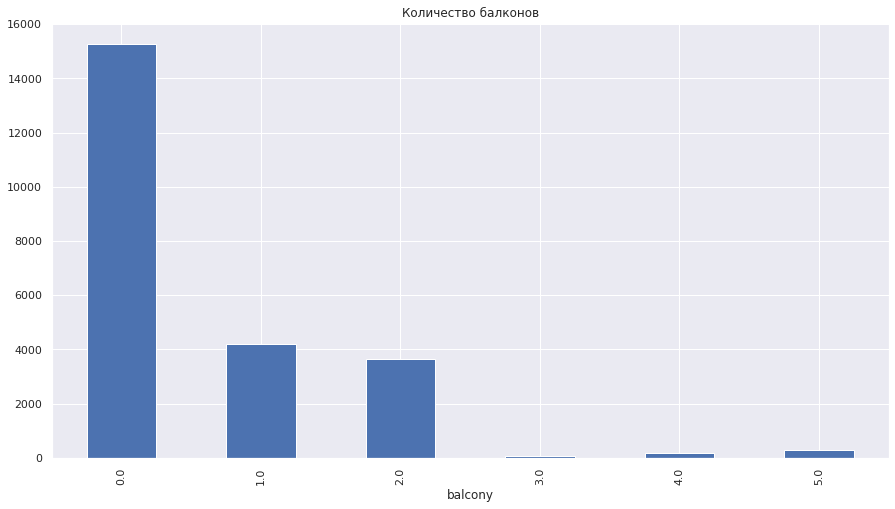

In [13]:
df['balcony'] = df['balcony'].fillna(0) # заменим все Nan значения в столбце балконы на 0
(
df
    .groupby('balcony')['rooms']
    .agg('count')
    .plot(kind='bar', title='Количество балконов')
) # посмотрим распределение квартир по количеству балконов

In [14]:
df['balcony'] = df['balcony'].astype('int') # переведем занчения в int

In [15]:
# is_apartment
# Посмотрим значения в столбце is_apartment

In [16]:
df['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [17]:
# Скорее всего квартиры не являющиеся апартаментами отмечены как Nan 
# меняем тип данных c object на bool и заполняем все Nan значением False
df['is_apartment'] = df['is_apartment'].fillna('')

In [18]:
df['is_apartment'] = df['is_apartment'].astype('bool') 

In [19]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [20]:
# ceiling_height

df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 6), 'ceiling_height'] = None 
# обнулим значения где высота потолка меньше 2,5 метров и больше 6 метров
# удалять Nan не будем т.к рискуем потерять слишком много данных

<AxesSubplot:xlabel='ceiling_height', ylabel='total_area'>

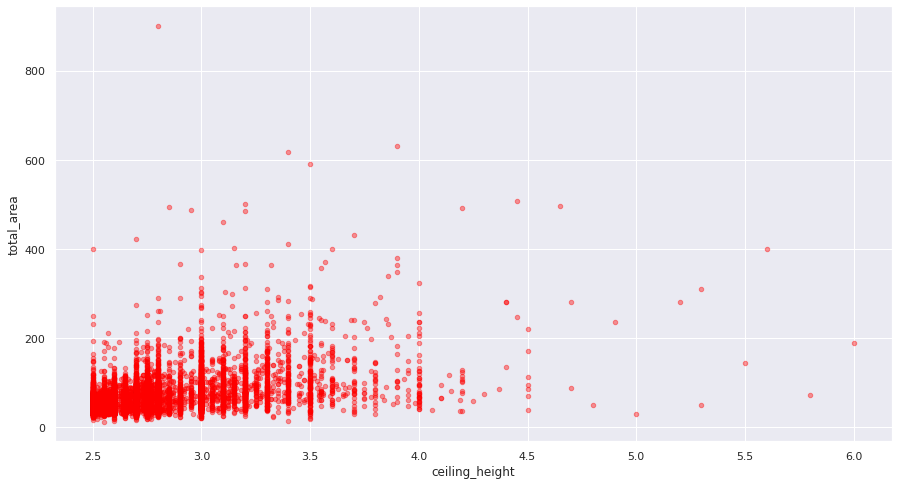

In [21]:
df.plot(x='ceiling_height', y='total_area', kind = 'scatter', color= 'red', alpha=0.4) 
# проверим наш фильтр, посмотрим распределение квартир по параметрам площадь/высота    

In [22]:
# Основная масса квартир имеет полщадь до 200 м и высоту потолков до 4 м

In [23]:
# first_day_exposition
# Согласно описанию это дата публикации, переведем тип данных в формат даты, времени
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition'] 

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [24]:
# last_price
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [25]:
# locality_name
# Посмотрим на значения в столбце
df['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
садовое товарищество Рахья                                     1
деревня Ялгино                                                 1
поселок Калитино                                               1
посёлок при железнодорожной станции Приветнинское              1
садоводческое некоммерческое товарищество Лесная Поляна        1
Name: locality_name, Length: 364, dtype: int64

In [26]:
from collections import Counter
print(Counter(df['locality_name'])) #посмотрим более детально..

Counter({'Санкт-Петербург': 15721, 'посёлок Мурино': 522, 'посёлок Шушары': 440, 'Всеволожск': 398, 'Пушкин': 369, 'Колпино': 338, 'посёлок Парголово': 327, 'Гатчина': 307, 'деревня Кудрово': 299, 'Выборг': 237, 'Петергоф': 201, 'Сестрорецк': 183, 'Красное Село': 178, 'Кудрово': 173, 'деревня Новое Девяткино': 144, 'Сертолово': 142, 'Ломоносов': 133, 'Кириши': 125, 'Сланцы': 112, 'Волхов': 111, 'Кингисепп': 104, 'Тосно': 104, 'Кронштадт': 96, 'Никольское': 93, 'Коммунар': 89, 'Сосновый Бор': 87, 'Кировск': 84, 'Отрадное': 80, 'посёлок Бугры': 69, 'посёлок Металлострой': 66, 'Приозерск': 66, 'деревня Старая': 64, 'городской посёлок Янино-1': 61, 'Шлиссельбург': 57, 'Луга': 56, 'Тихвин': 49, nan: 49, 'поселок Бугры': 45, 'посёлок Стрельна': 44, 'посёлок Тельмана': 39, 'Павловск': 38, 'поселок Романовка': 36, 'Волосово': 36, 'поселок Мурино': 34, 'Мурино': 34, 'посёлок городского типа Сиверский': 29, 'Ивангород': 28, 'городской посёлок Новоселье': 28, 'городской посёлок Мга': 27, 'поселок

In [27]:
# уберем неявные дубликаты,
# оставим только названия населенных пунктов, уберем такие слова как поселок, деревня, городской и т.п
df = (
df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 
                              'посёлок городского типа': 'посёлок','коттеджный посёлок': 'посёлок', 
                              'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))
)
len(df.locality_name.unique())

334

In [28]:
print(Counter(df['locality_name'])) # посмотрим на результат

Counter({'Санкт-Петербург': 15721, 'посёлок Мурино': 556, 'посёлок Шушары': 440, 'Всеволожск': 398, 'Пушкин': 369, 'Колпино': 338, 'посёлок Парголово': 327, 'Гатчина': 307, 'деревня Кудрово': 299, 'Выборг': 237, 'Петергоф': 201, 'Сестрорецк': 183, 'Красное Село': 178, 'Кудрово': 173, 'деревня Новое Девяткино': 144, 'Сертолово': 142, 'Ломоносов': 133, 'Кириши': 125, 'посёлок Бугры': 114, 'Сланцы': 112, 'Волхов': 111, 'Кингисепп': 104, 'Тосно': 104, 'Кронштадт': 96, 'Никольское': 93, 'Коммунар': 89, 'Сосновый Бор': 87, 'Кировск': 84, 'Отрадное': 80, 'посёлок Металлострой': 66, 'Приозерск': 66, 'деревня Старая': 64, 'посёлок Янино-1': 61, 'Шлиссельбург': 57, 'Луга': 56, 'Тихвин': 49, nan: 49, 'посёлок Стрельна': 44, 'посёлок Тельмана': 41, 'Павловск': 38, 'посёлок Романовка': 36, 'Волосово': 36, 'Мурино': 34, 'посёлок Мга': 33, 'посёлок Сиверский': 29, 'Ивангород': 28, 'посёлок Новоселье': 28, 'посёлок городского типа имени Свердлова': 25, 'Сясьстрой': 24, 'Зеленогорск': 24, 'посёлок Щегл

In [29]:
df['locality_name'].isnull().sum() # еще раз выведем кол-во Nan в этом столбцe

49

In [30]:
df.loc[df['cityCenters_nearest'] < 20000, 'locality_name'].fillna('Санкт-Петербург') 
# заполним все Nan зенвчением 'Санкт=Петербург', где расстояние до центра меньше 20 км

0        Санкт-Петербург
1         посёлок Шушары
2        Санкт-Петербург
3        Санкт-Петербург
4        Санкт-Петербург
              ...       
23689    Санкт-Петербург
23690    Санкт-Петербург
23691    Санкт-Петербург
23694    Санкт-Петербург
23697    Санкт-Петербург
Name: locality_name, Length: 15548, dtype: object

In [31]:
df = df.dropna(subset=['locality_name']) # удалим остальные значения

In [32]:
df['locality_name'].isnull().sum() # проверим

0

In [33]:
df = df.dropna(subset=['floors_total'])

In [34]:
df['floors_total'] = df['floors_total'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14379 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [35]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm') # посмотрим что получилось после обработки

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,7.900000
floor,0.000000
is_apartment,0.000000


Вывод: на этапе предобработки данных мы заполнили пропущенные значения в столбце balcony, is_apartment, в столбце locality_name помимо пропущенных значений, мы так же убрали неявные дубликаты, были убраны аномальные значения в столбце ceiling_height..

### Посчитайте и добавьте в таблицу новые столбцы

In [36]:
# цена одного квадратного метра
df['price_for_m'] = df['last_price']/df['total_area']
df['price_for_m']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_for_m, Length: 23565, dtype: float64

In [37]:
# день публикации объявления
# добавим столбец день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [38]:
# так же заполним месяц и год публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month   
df['year_exposition'] = df['first_day_exposition'].dt.year

In [39]:
# добавим столбец тип этажа квартиры (значения — «первый», «последний», «другой»)
df.loc[:, 'floor_location'] = 'другой'
df.loc[df['floor'] == 1, 'floor_location'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_location'] = 'последний'
df['floor_location'].value_counts()


другой       17326
последний     3355
первый        2884
Name: floor_location, dtype: int64

In [40]:
# добавим столбец расстояние в км до центра города
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000

Вывод: на данном этапе были добавлены все необходимые колонки, которые в дальнейшем помогут нам в анализе данных

### Проведите исследовательский анализ данных

 Ниже опишем следующие параметры:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

<AxesSubplot:>

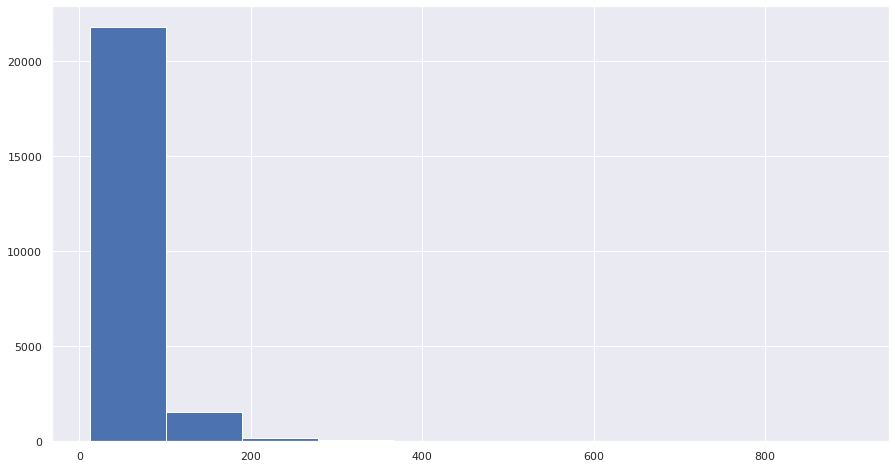

In [41]:
# общая площадь;

df['total_area'].describe()
df['total_area'].hist()
# в среднем все квартиры имеют площадь 50 метров квадратных,самая большая квартира 900 метров, самая маленькая 12 метров

In [42]:
# жилая площадь;
df['living_area'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

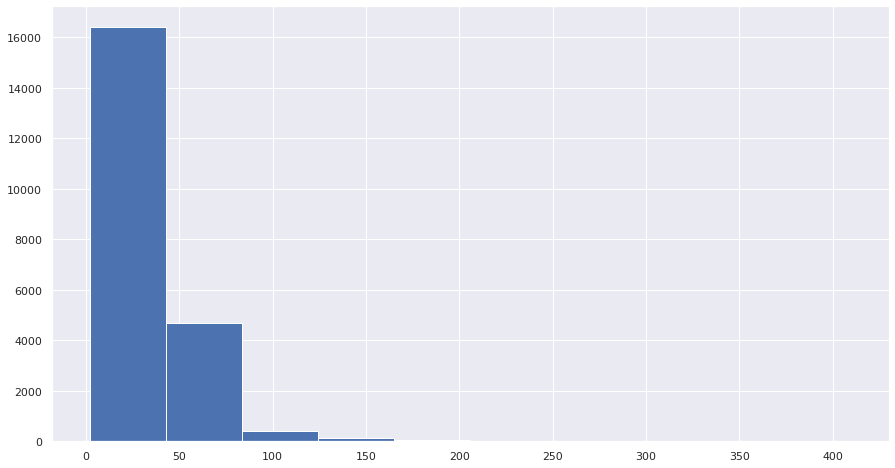

In [43]:
# в среднем все квартиры имеют жилую площадь площадь 30 метров квадратных,
# самая большая квартира 409 метров, самая маленькая 2 метра( возможно это маленькая студия)
df['living_area'].hist()

In [44]:
# площадь кухни
df['kitchen_area'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

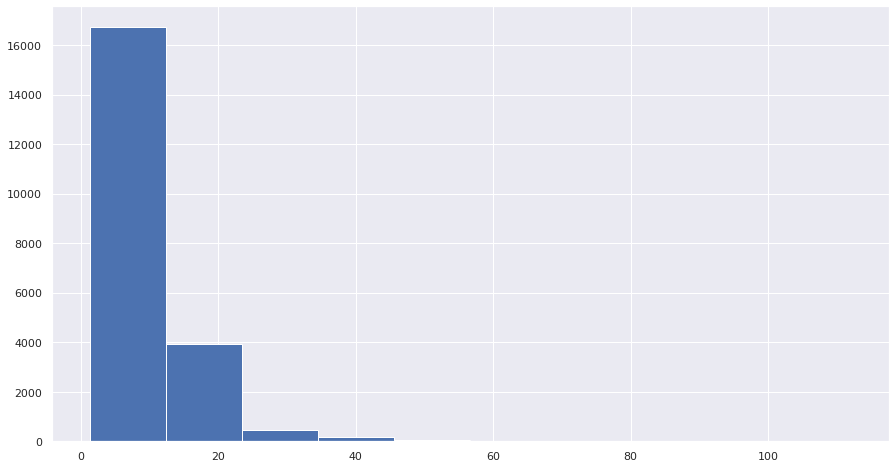

In [45]:
# в среднем все квартиры имеют площадь кухни 9 метров квадратных,
# самая большая квартира - 112 метров, самая маленькая - 1.3 метра( возможно это маленькая студия)
df['kitchen_area'].hist()

<AxesSubplot:>

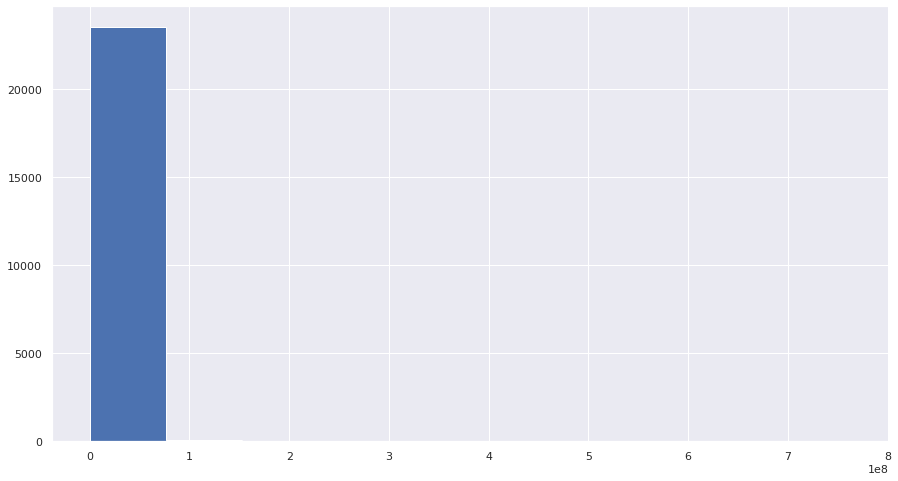

In [46]:
# цена объекта;
df['last_price'].describe()
# Более 75% продентов всех объявлений имеют стоимость до 7 млн, 
# но так же присутствуют и очень дорогие объекты, максимальная стоимость 763 млн
df['last_price'].hist()

In [47]:
# количество комнат
df['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

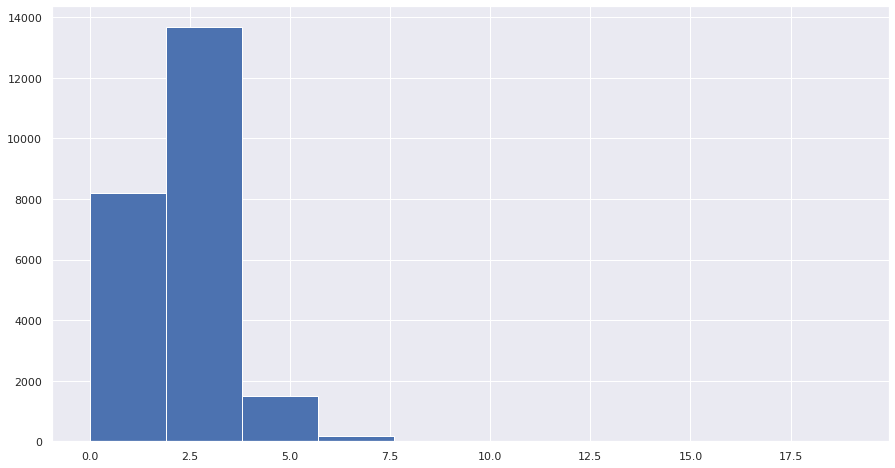

In [48]:
# в среднем все квартиры имеют по 2 комнаты,
# самое большое количество комнат 19, самая маленькое 0 (возможно так отображается студия)
df['rooms'].hist()

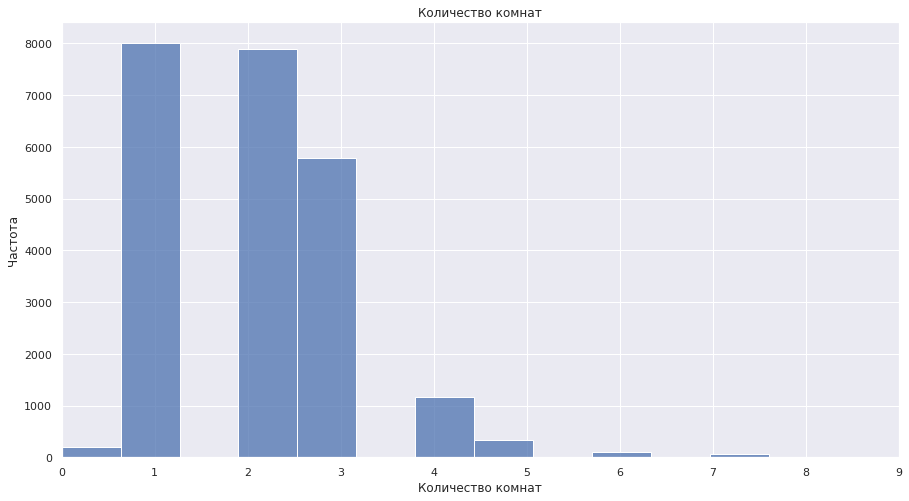

In [49]:
#Код ревьюера
sns.histplot(df['rooms'], kde=False, bins=30)
plt.xlim(0,9)
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.show()

<AxesSubplot:>

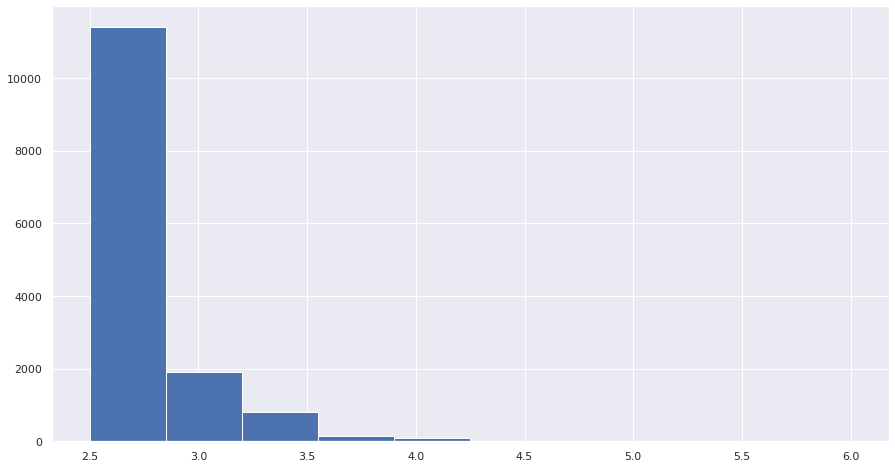

In [50]:
df['ceiling_height'].describe()
# средняя высота потолков 2.65 м, максимльное 6.0 и минимальные 2.5(мы убирали аномалии в данном столбце)
df['ceiling_height'].hist()

<AxesSubplot:>

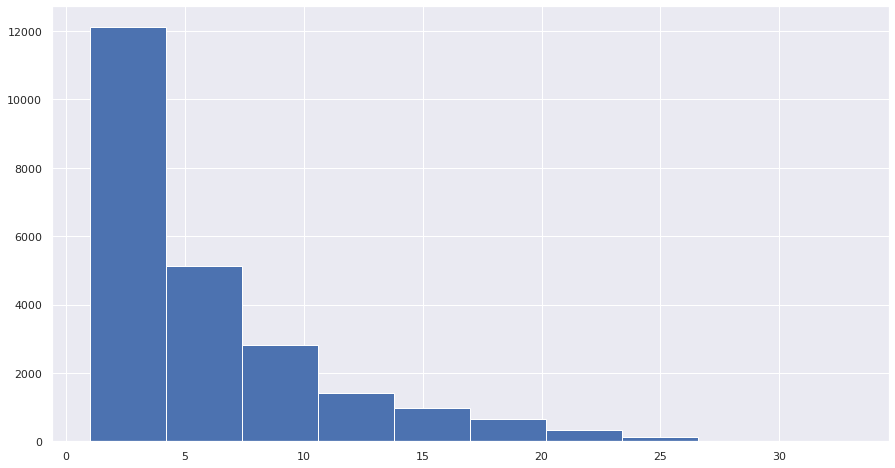

In [51]:
# этаж квартиры
df['floor'].describe()
# максимальный этаж 33, минимальный соответственно 1
df['floor'].hist()

<AxesSubplot:>

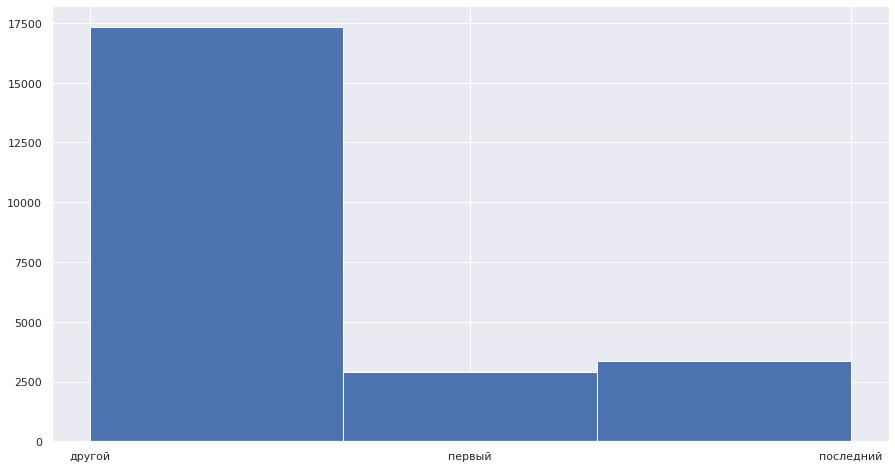

In [52]:
df['floor_location'].hist(bins=3) # распределение по этажам

In [53]:
# общее количество этажей в доме
df['floors_total'].describe() # средняя этажность дома где предается квартира 9 этажей,
# максимальная этажность 60 этажей и минимальная соответственно 1 этаж

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

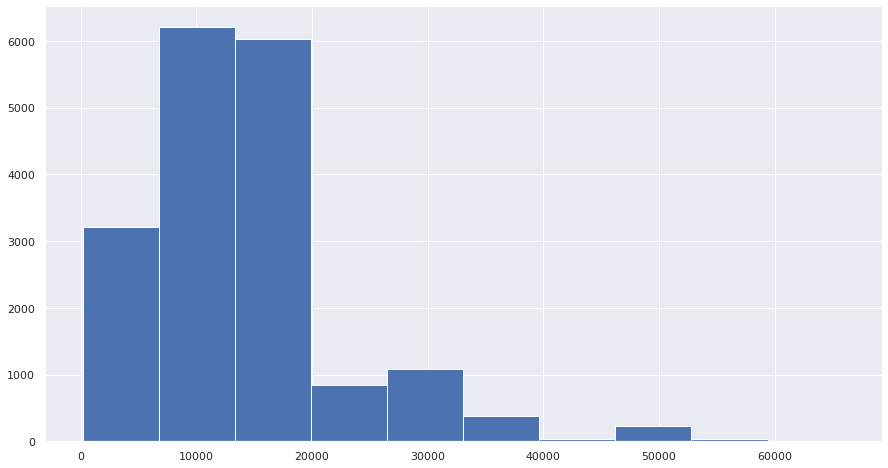

In [54]:
# расстояние до центра города в метрах
df['cityCenters_nearest'].describe()
# половина всех квартир находится на расстоянии 13 км до центра города
df['cityCenters_nearest'].hist()

<AxesSubplot:>

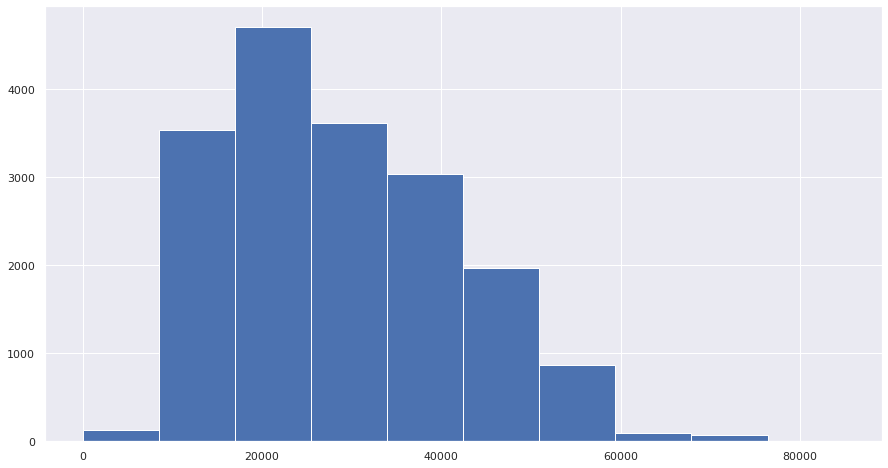

In [55]:
df['airports_nearest'].describe()
# максимальное расстояние до аэропорта 84 км
df['airports_nearest'].hist()

<AxesSubplot:>

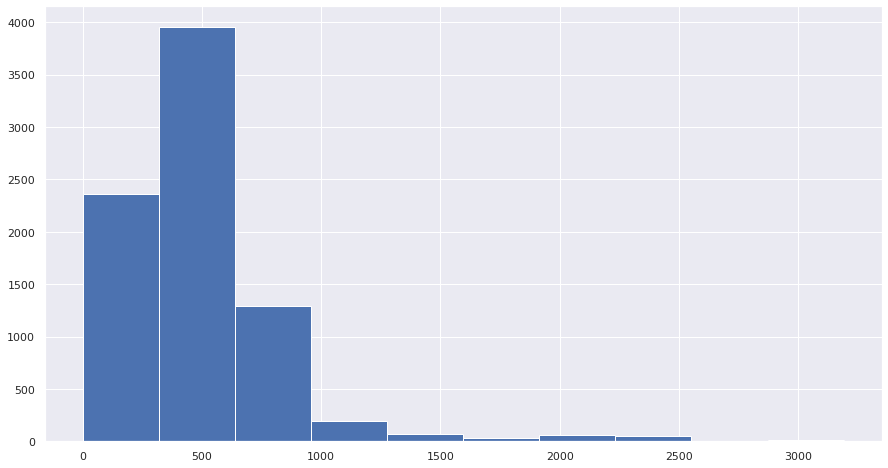

In [56]:
df['parks_nearest'].describe()
# среднее расстояние до парка 455 м
df['parks_nearest'].hist()

<AxesSubplot:>

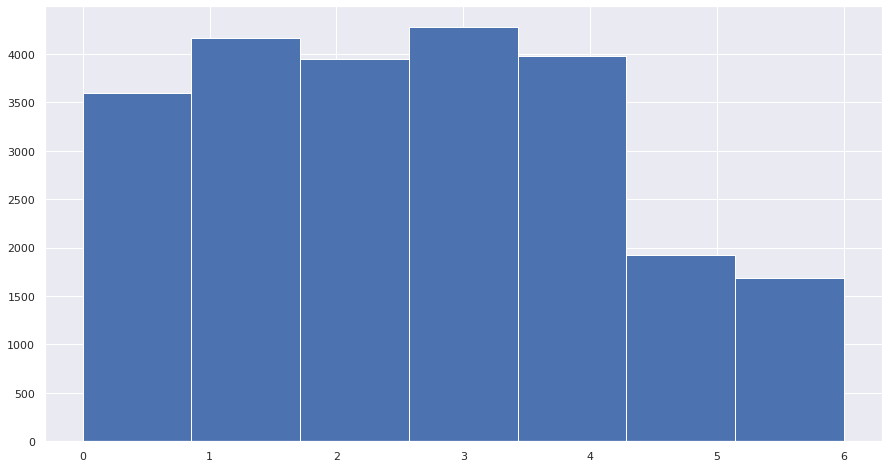

In [57]:
# распределение публикаций обьявления в зависимости от дня недели
df['weekday_exposition'].hist(bins=7) # посмотрим на результат с помощью гистограммы..

In [58]:
# по данной гистограмме можно сделать вывод, что в основном объявления публикуются по будням
# в выходные видим существенную просадку по публикациям

<AxesSubplot:>

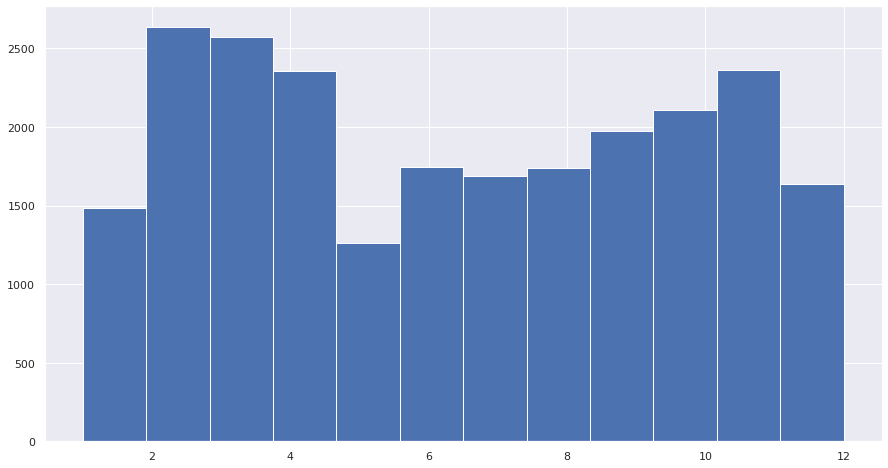

In [59]:
# распределение публикаций обьявления по месяцам
df['month_exposition'].hist(bins=12) 

In [60]:
# больше всего объявлений было опубликовано в феврале и марте, меньше всего в мае

<AxesSubplot:>

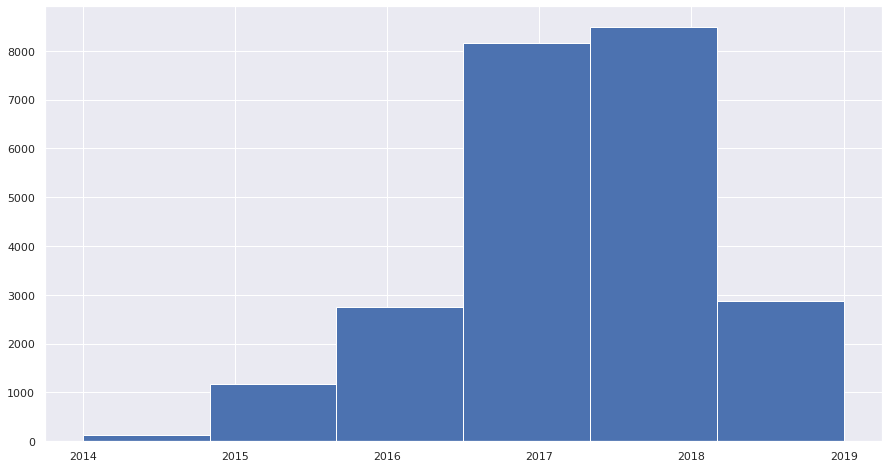

In [61]:
# распределение публикаций обьявления по годам
df['year_exposition'].hist(bins=6) 

In [62]:
df['first_day_exposition'].describe()

count                   23565
unique                   1489
top       2018-02-01 00:00:00
freq                      366
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

In [63]:
# Самое большое количество публикаций объявлений наблюдаем в 2018 году
# Судить про ситуацию в 2014 и в 2019 году мы не можем т.к по ним данные не полные, 
# первое объявление в нашем датафрейме от 2014-11-27, последнее объявление в нашем датафрейме от 2019-05-03

In [64]:
# Изучим столбец days_exposition. Этот параметр показывает, сколько дней «висело» каждое объявление
df['days_exposition'].describe() 

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

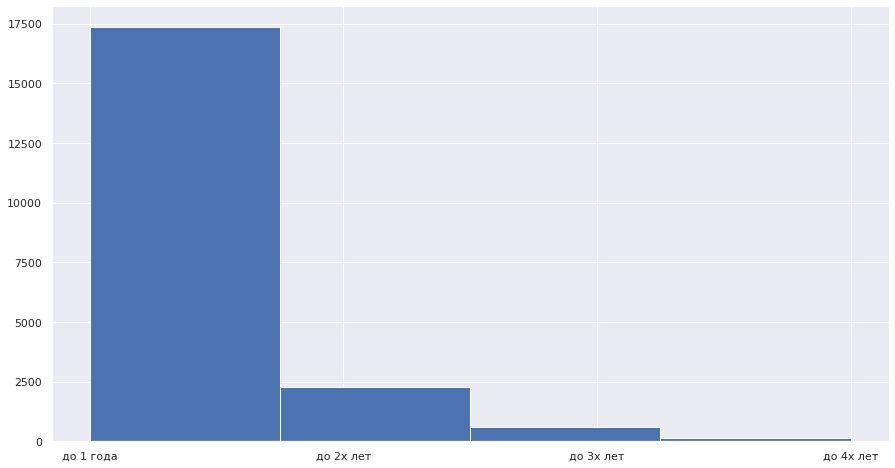

In [65]:
# видим что более 25% квартир реализуются до 45 дней, объявления снимаются в продажи
# (достоверно утверждать не можем, объявления могут сниматься и по другим причинам)
# хотя основная масса квартир реализуется в срок до 1 года, есть случаи когда объявление висит более 4х лет 
# для удобства визуализации - разобьем данные на несколько корзин
cut_labels_4 = ['до 1 года','до 2х лет', 'до 3х лет', 'до 4х лет']
cut_bins = [0, 365, 730, 1095, 1460]
pd.cut(df['days_exposition'],bins=cut_bins,labels=cut_labels_4).hist(bins=4)

<AxesSubplot:xlabel='days_exposition'>

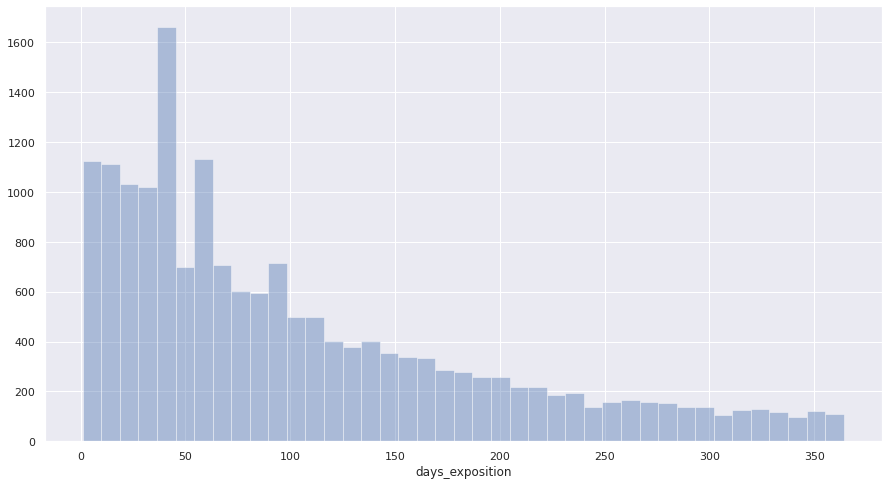

In [66]:
# видим слишком большой массив данных в графе до 1 года, посмотрим на него более детально

sns.distplot(df.query('days_exposition<=365').days_exposition, kde=False)

In [67]:
# Интересно что самое большое количество объявлений было снято с продажи примерно после 40 дней размещения..
# Так же посчитаем:
df['days_exposition'].mean() # среднее

180.7413945278023

In [68]:
df['days_exposition'].median() # медиана

95.0

In [69]:
# Обратим внимание что среднее почти в 2 раза больше медианы, оно сильно сдвинуто из за аномально долгих продаж

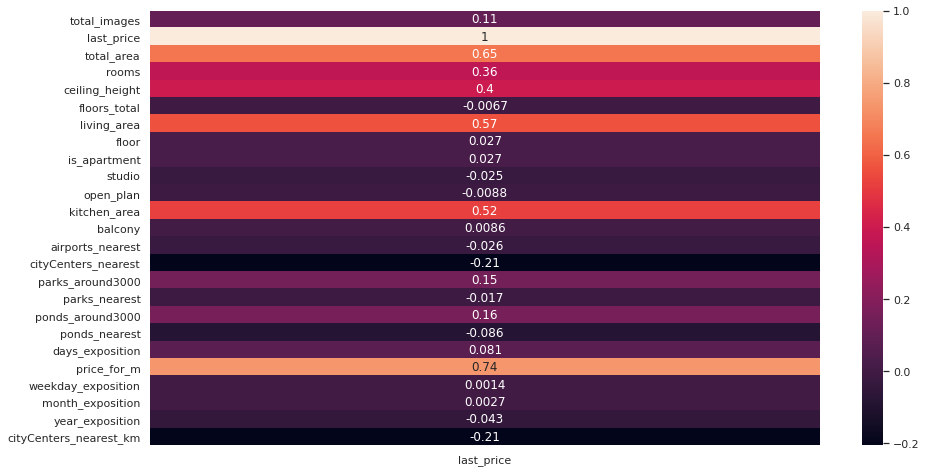

In [70]:
# Построим heatmap значений корреляций Пирсона
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr()[['last_price']], annot = True,)
plt.show()

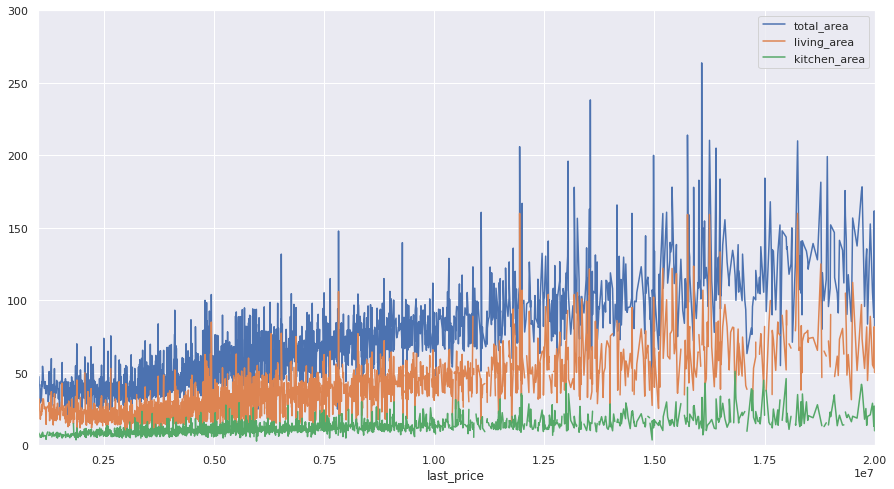

In [71]:
# Видим существенную кореляцию стоимости и площади квартир. Проверим результаты построив график:
# Построим графики, которые покажут зависимость цены от общей площади; жилой площади; площади кухни
# Чтобы слишком элитная недвижимость не мешала построению графика, ограничем стоимость от 1 млн до 20 млн, а площадь до 300 м
df.groupby('last_price')['total_area','living_area','kitchen_area'].mean().plot(xlim=(1000000, 20000000), ylim=(0, 300));


In [72]:
# бывают исключения, но в целом по данному графику можно проследить прямую зависимость
# чем больше общая и жилая площадь, тем выше цена, для площади кухни это утверждение справедливо в меньшей степени

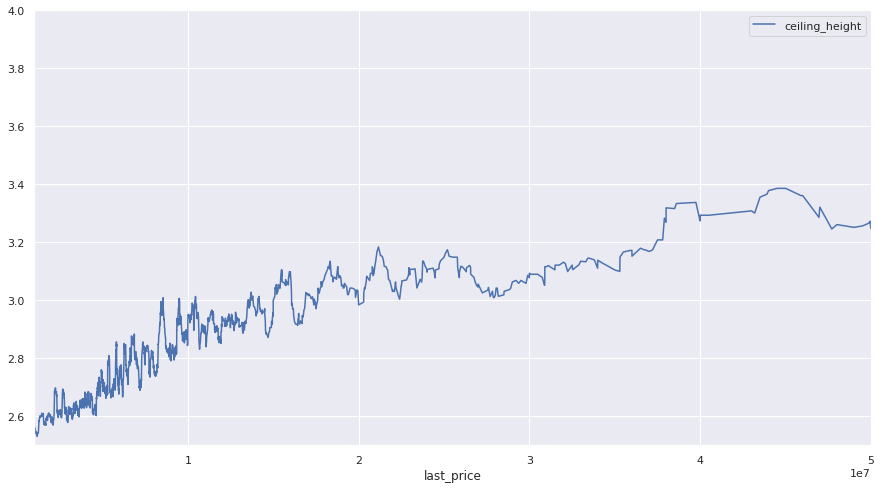

In [73]:
# Так же кореляция Пирсона показала нам небольшую зависимость стоимости от высоты потолков
# Проверим это построив график, сразу маштабируем его по стоимости и высоте потолков от 2.5м до 4 м
df.pivot_table(index='last_price',values='ceiling_height').rolling(20).mean().plot(xlim=(1000000, 50000000), ylim=(2.5, 4));

In [74]:
# Действительно зависимость слабая, но она присутствует, чем выше высота потолка тем больше стоимость..

<AxesSubplot:xlabel='rooms'>

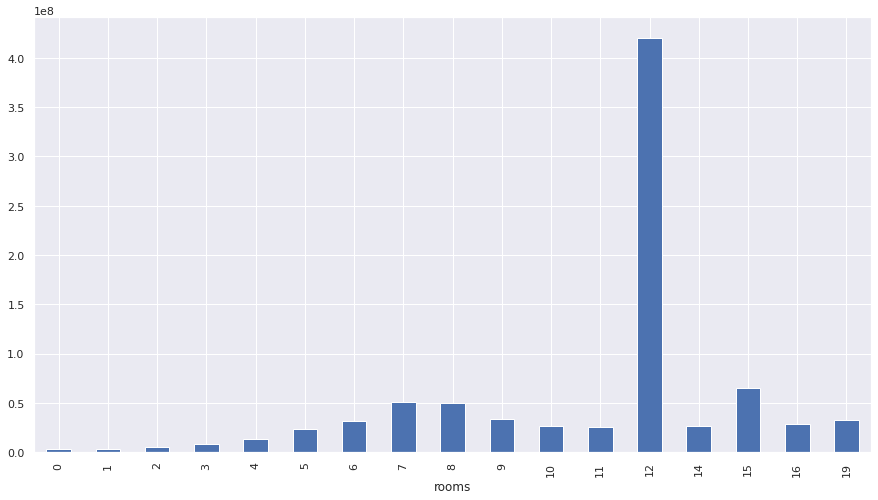

In [75]:
# Посмотрим соотношение стоимости и кол-ва комнат
df.groupby('rooms')['last_price'].agg('mean').plot(kind='bar')

In [76]:
# от 0 до 7 комнат видим прямую зависимость, чем больше комнат тем дороже квартира
# начиная с 8 комнат все не так однозначно, т.к это уже элитная недвижимость и на стоимость могут влиять и другие факторы
# видим аномальную стоимость 12 комнатных квартир, посмотрим детальнее..
df.query('rooms==12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday_exposition,month_exposition,year_exposition,floor_location,cityCenters_nearest_km
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,NaN,2.0,318.0,106.0,466666.666667,2,12,2017,последний,7.877


In [77]:
# Объект только один и это наш самый большой по площади объект, скорее всего это пентхаус..
# с учетом того что он находится недалеко от центра на последнем 25-ом этаже..
# скорее всего это реальное объявление с реальной стоимостью..

<AxesSubplot:xlabel='last_price', ylabel='parks_nearest'>

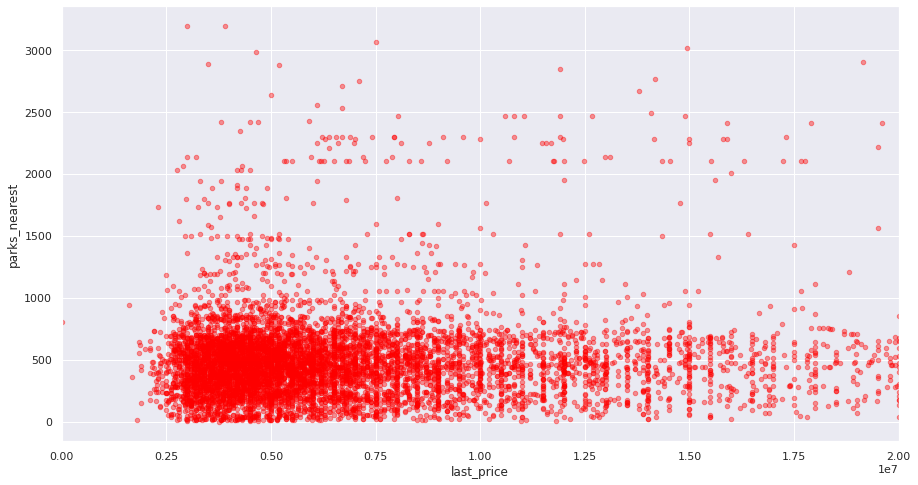

In [78]:
# parks_nearest и ponds_nearest
# построим графики чтобы выяснить как расстояние до парка или пруда влияет на стоимость объекта
# возьмем квартиры стоимостью до 20 млн
df.plot(x='last_price', y='parks_nearest', kind = 'scatter', color= 'red', alpha=0.4, xlim=(0,20000000))

<AxesSubplot:xlabel='last_price', ylabel='ponds_nearest'>

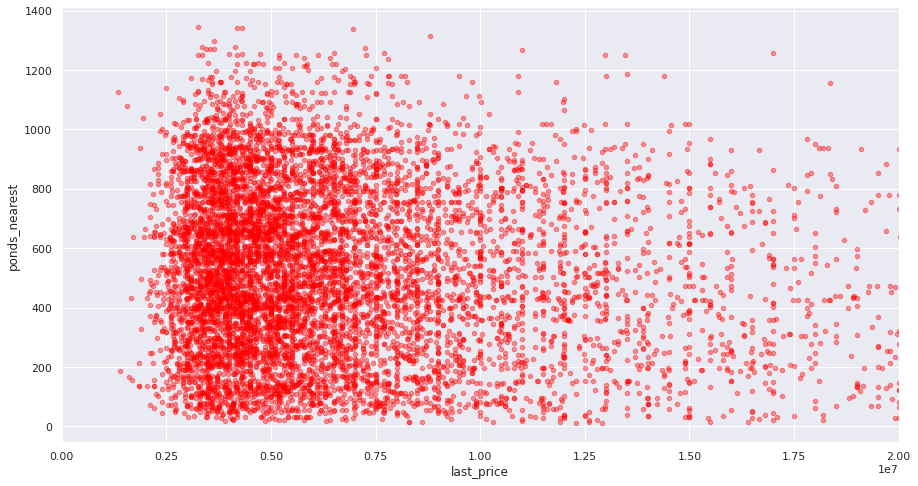

In [79]:
df.plot(x='last_price', y='ponds_nearest', kind = 'scatter', color= 'red', alpha=0.4, xlim=(0,20000000))

In [80]:
# Как видим из графиков расстояние до парка либо до пруда не является решающим фактором при определении стоимости квартиры

<AxesSubplot:ylabel='floor_location'>

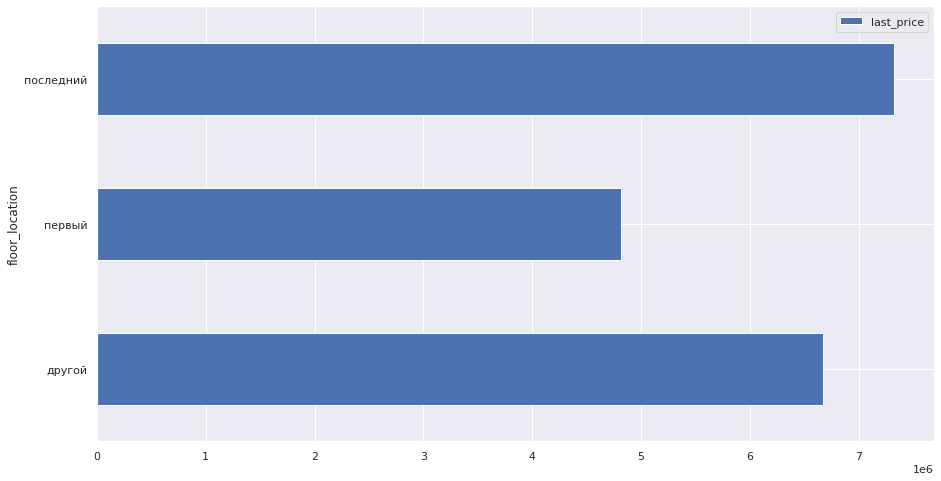

In [81]:
# Стоимость в зависимости от этажа:
df.pivot_table(index='floor_location',values='last_price').plot(y='last_price', kind = 'barh')

In [82]:
# наименьшая стоимость у квартир на первом этаже, самая большая стоимость у квартир на последнем..

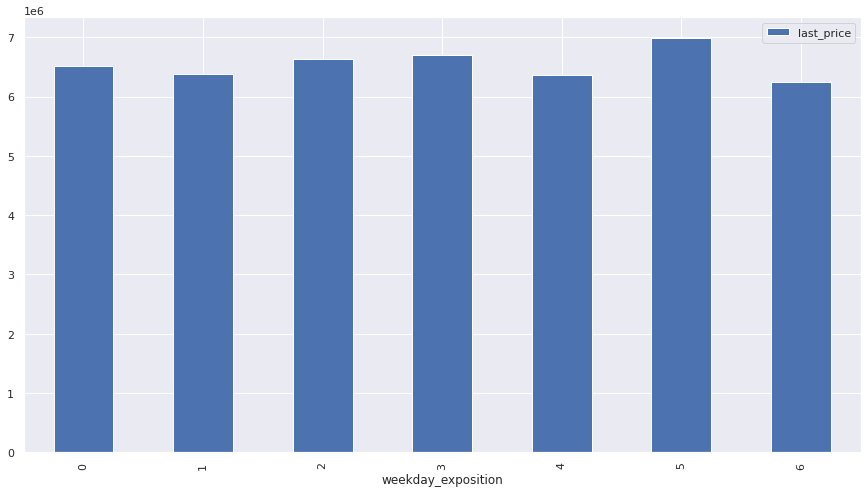

In [83]:
# Посмотрим зависимость стоимости квартиры от дня публикации объявления..
df.pivot_table(index='weekday_exposition',values='last_price').plot(y='last_price', kind = 'bar');

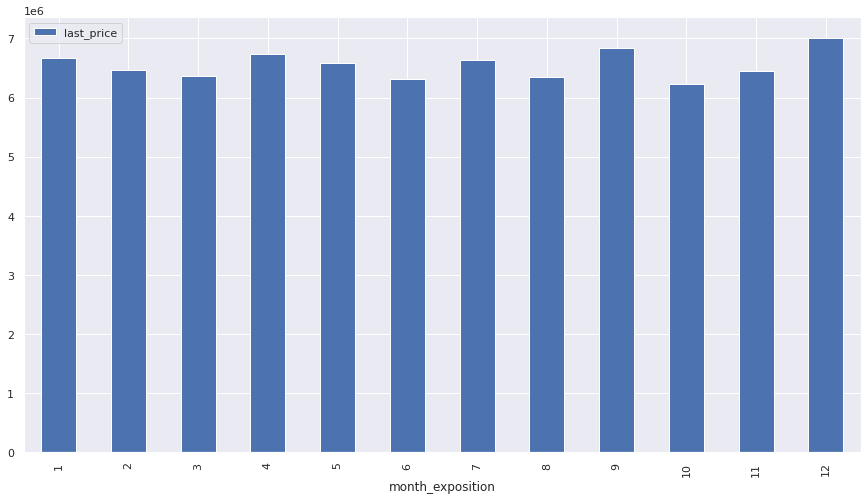

In [84]:
# ..от месяца публикаци... 
df.pivot_table(index='month_exposition',values='last_price').plot(y='last_price', kind = 'bar');

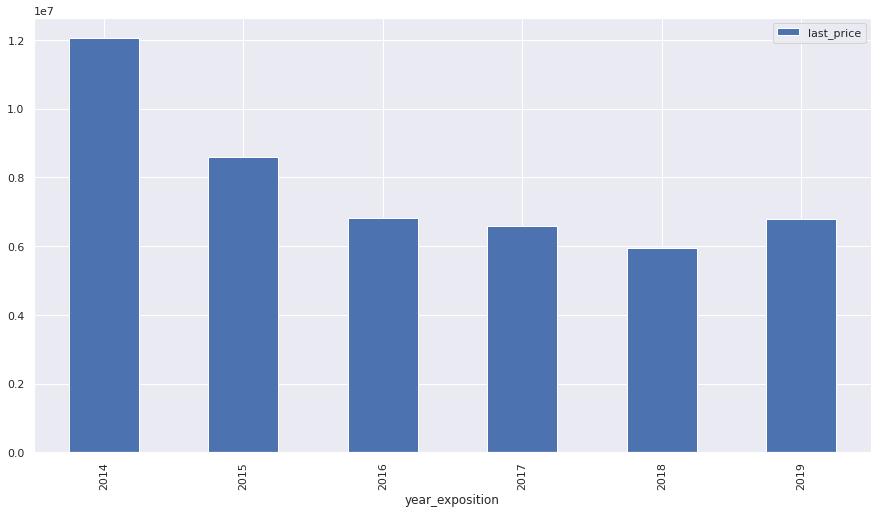

In [85]:
# ..от года публикаци... 
df.pivot_table(index='year_exposition',values='last_price').plot(y='last_price', kind = 'bar');

In [86]:
# По данным графикам можно сделать вывод что цена на момент снятия с публикации падала с 2014 по 2018 год, 
# зависимость же стоимости от дня и месяца публикации не выражена столь явно

In [87]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15651
посёлок Мурино         552
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

<AxesSubplot:ylabel='locality_name'>

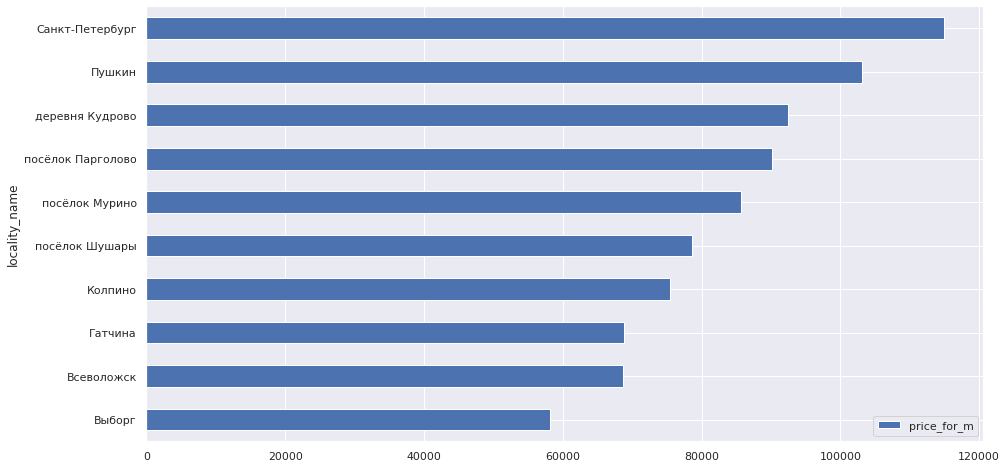

In [88]:
t = df[df.locality_name.isin(df.locality_name.value_counts().index[:10])]
(
t.pivot_table(index='locality_name', values='price_for_m',  aggfunc='mean')
    .sort_values(by='price_for_m')
    .plot(kind='barh')
)

In [89]:
# Самая высокая стоимость кв.метра в Санкт-Петербурге и в г.Пушкин
# Самая низкая в Выборге

In [90]:
# Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену за квадратный метр для каждого километра
# Возьмем ближайшие 20 км от центра
spb = df[df['locality_name']=='Санкт-Петербург']
spb = spb[spb['cityCenters_nearest_km']<=20].round()
price_per_km = spb.pivot_table(index = 'cityCenters_nearest_km', values= 'price_for_m', aggfunc='mean').round(1)
price_per_km

,price_for_m
cityCenters_nearest_km,
0.0,245833.5
1.0,177005.4
2.0,157849.0
3.0,121507.8
4.0,133282.9
5.0,140454.0
6.0,151012.2
7.0,156176.9
8.0,125649.7


<AxesSubplot:xlabel='cityCenters_nearest_km'>

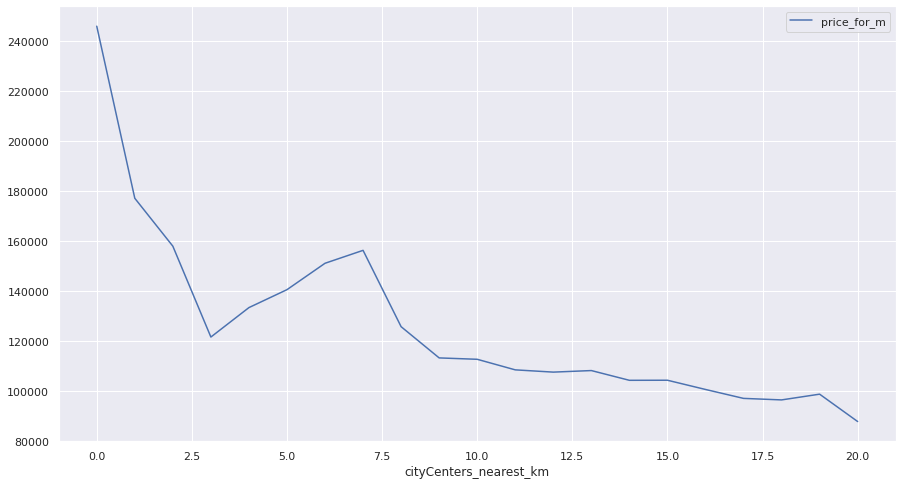

In [91]:
price_per_km.plot()

In [92]:
# На графике видим что чем ближе к центру города тем дороже квартиры 
# есть только один "всплеск" на расстоянии 5-7 км от центра, 
# как раз на этом расстоянии от центра находятся "Сталинки", которые считаются хорошим жилым фондом..

### Общий вывод

Изучив объявления с сервися Яндекс.Недвижимость можно сделать вывод что на стоимость квартиры влияют сл. факторы:
- Расстояние от центра города, чем ближе к центру тем выше стоимость квартиры, небольшая аномалия на расстоянии 5-7.5 км, объясняем наличием соответствующего жилого фонда - 'Сталинок', так же дорогая недвижимость в городе Пушкин, который находится уже за пределами Санкт-Петербурга
- Площадь, чем больше общая и жилая площадь объекта тем дороже квартира, для площади кухни это утверждение справедливо в  меньшей степени
- Этажность, меньше всего стоят квартиры на первом этаже, больше всего на последнем
- Количество комнат, прямая зависимость в объявлениях с квартирами до 7 комнат, дальше идет элитная недвижимость где уже не прослеживается явная зависимость стоимости квартиры от кол-ва комнат
- Присутствует слабая зависимость стоимости квартиры от высоты потолка
- Самое большое кол-во снятия объявлений(продаж) в районе 40 дней после публикации
- Самое большое количество публикаций было в 2018 году(среди полных лет нашего датасета)
- Цена на момент снятия с публикации объявления падала с 2014 по 2018 год
